In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

In [5]:
df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [6]:
df['binary_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)

In [7]:
pd.pivot_table(data=df,index='attack_category',columns='protocoltype',values='duration',aggfunc='count',margins=True)

protocoltype,icmp,tcp,udp,All
attack_category,,,,
access,NaN,993.0,NaN,993
backdoor,NaN,958.0,NaN,958
dos,2847.0,41232.0,892.0,44971
exploit,NaN,49.0,3.0,52
normal,1309.0,53600.0,12434.0,67343
scan,4135.0,5857.0,1664.0,11656
All,8291.0,102689.0,14993.0,125973


In [8]:
flag_attack = pd.pivot_table(data=df,index='flag',columns='is_attack',values='duration',aggfunc='count')
flag_attack['attack'] = (flag_attack['attack']/58630)*100
flag_attack

is_attack,attack,normal
flag,,
OTH,0.059696,11.0
REJ,14.565922,2693.0
RSTO,2.290636,219.0
RSTOS0,0.175678,NaN
RSTR,3.880266,146.0
S0,58.838479,354.0
S1,0.006822,361.0
S2,0.013645,119.0
S3,0.006822,45.0


In [9]:
flag_cat = pd.pivot_table(data=df,index='flag',columns='attack_category',values='duration',aggfunc='count',fill_value=0,margins=True)
flag_cat['access'] = (flag_cat['access']/flag_cat['All'])*100
flag_cat['backdoor'] = (flag_cat['backdoor']/flag_cat['All'])*100
flag_cat['dos'] = (flag_cat['dos']/flag_cat['All'])*100
flag_cat['exploit'] = (flag_cat['exploit']/flag_cat['All'])*100
flag_cat['normal'] = (flag_cat['normal']/flag_cat['All'])*100
flag_cat['scan'] = (flag_cat['scan']/flag_cat['All'])*100
flag_cat

attack_category,access,backdoor,dos,exploit,normal,scan,All
flag,,,,,,,
OTH,0.000000,0.000000,0.000000,0.000000,23.913043,76.086957,46
REJ,0.000000,0.000000,50.485178,0.000000,23.974005,25.540817,11233
RSTO,2.944942,0.000000,77.848912,0.064020,14.020487,5.121639,1562
RSTOS0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,103
RSTR,0.206526,3.717472,0.000000,0.000000,6.030566,90.045436,2421
S0,0.000000,0.000000,98.545235,0.000000,1.015753,0.439012,34851
S1,0.273973,0.547945,0.000000,0.000000,98.904110,0.273973,365
S2,0.787402,3.937008,0.000000,0.000000,93.700787,1.574803,127
S3,6.122449,0.000000,0.000000,0.000000,91.836735,2.040816,49


In [10]:
pd.pivot_table(data=df,index='flag',columns='attack_category',values='duration',aggfunc='count',fill_value=0,margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
flag,,,,,,,
OTH,0,0,0,0,11,35,46
REJ,0,0,5671,0,2693,2869,11233
RSTO,46,0,1216,1,219,80,1562
RSTOS0,0,0,0,0,0,103,103
RSTR,5,90,0,0,146,2180,2421
S0,0,0,34344,0,354,153,34851
S1,1,2,0,0,361,1,365
S2,1,5,0,0,119,2,127
S3,3,0,0,0,45,1,49


In [11]:
pd.pivot_table(data=df,index='wrongfragment',columns='attack_category',values='duration',aggfunc='count',fill_value=0,margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
wrongfragment,,,,,,,
0,993,958,43881,52,67343,11656,124883
1,0,0,206,0,0,0,206
3,0,0,884,0,0,0,884
All,993,958,44971,52,67343,11656,125973


In [12]:
pd.pivot_table(data=df,index='wrongfragment',columns='protocoltype',values='duration',aggfunc='count',fill_value=0,margins=True)

protocoltype,icmp,tcp,udp,All
wrongfragment,,,,
0,8093,102689,14101,124883
1,198,0,8,206
3,0,0,884,884
All,8291,102689,14993,125973


In [13]:
pd.pivot_table(data=df,index='urgent',columns='attack_category',values='duration',aggfunc='count',fill_value=0,margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
urgent,,,,,,,
0,991,958,44971,51,67337,11656,125964
1,1,0,0,1,3,0,5
2,1,0,0,0,2,0,3
3,0,0,0,0,1,0,1
All,993,958,44971,52,67343,11656,125973


In [14]:
pd.pivot_table(data=df,index='urgent',columns='protocoltype',values='duration',aggfunc='count',fill_value=0,margins=True)

protocoltype,icmp,tcp,udp,All
urgent,,,,
0,8291,102680,14993,125964
1,0,5,0,5
2,0,3,0,3
3,0,1,0,1
All,8291,102689,14993,125973


In [15]:
df['is_hot'] = df['hot'].apply(lambda x: 1 if x==1 else 0)

In [16]:
pd.pivot_table(data=df,index='attack_category',columns='is_hot',values='duration',aggfunc='count',fill_value=0,margins=True)

is_hot,0,1,All
attack_category,,,
access,935,58,993
backdoor,894,64,958
dos,44971,0,44971
exploit,45,7,52
normal,67119,224,67343
scan,11640,16,11656
All,125604,369,125973


In [17]:
pd.pivot_table(data=df,index='is_hot',columns='flag',values='duration',aggfunc='count',fill_value=0,margins=True)

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,All
is_hot,,,,,,,,,,,,
0,46,11233,1510,103,2344,34844,356,110,47,74742,269,125604
1,0,0,52,0,77,7,9,17,2,203,2,369
All,46,11233,1562,103,2421,34851,365,127,49,74945,271,125973


In [18]:
pd.pivot_table(data=df,index='flag',columns='is_hot',values='binary_attack',aggfunc='sum',fill_value=0,margins=True)

is_hot,0,1,All
flag,,,
OTH,35,0,35
REJ,8540,0,8540
RSTO,1297,46,1343
RSTOS0,103,0,103
RSTR,2217,58,2275
S0,34490,7,34497
S1,2,2,4
S2,4,4,8
S3,2,2,4


In [19]:
pd.pivot_table(data=df,index='is_hot',columns='protocoltype',values='duration',aggfunc='count',fill_value=0,margins=True)

protocoltype,icmp,tcp,udp,All
is_hot,,,,
0,8291,102320,14993,125604
1,0,369,0,369
All,8291,102689,14993,125973


In [20]:
pd.pivot_table(data=df,index='protocoltype',columns='is_hot',values='binary_attack',aggfunc='sum',fill_value=0,margins=True)

is_hot,0,1,All
protocoltype,,,
icmp,6982,0,6982
tcp,48944,145,49089
udp,2559,0,2559
All,58485,145,58630


In [21]:
df[np.logical_and(df['is_hot'] == 1, df['flag'].isin(['RSTO','RSTR']))]['attack_category'].value_counts()

,count
attack_category,
backdoor,58
access,45
normal,25
scan,1


In [22]:
df[df['hot'] > 0]['protocoltype'].value_counts()

,count
protocoltype,
tcp,2671


In [23]:
df['numfailedlogins'].value_counts()

,count
numfailedlogins,
0,125851
1,104
2,9
3,5
4,3
5,1


In [24]:
pd.pivot_table(data=df,index='numfailedlogins',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
numfailedlogins,,,,,,
0,941.0,958.0,44971.0,51.0,67275.0,11655.0
1,51.0,NaN,NaN,1.0,52.0,NaN
2,NaN,NaN,NaN,NaN,9.0,NaN
3,NaN,NaN,NaN,NaN,5.0,NaN
4,NaN,NaN,NaN,NaN,2.0,1.0
5,1.0,NaN,NaN,NaN,NaN,NaN


In [25]:
pd.pivot_table(data=df,index='numfailedlogins',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
numfailedlogins,,,,,,,,,,,
0,35.0,8540.0,1298.0,103.0,2271.0,34497.0,4.0,8.0,2.0,11549.0,269.0
1,NaN,NaN,45.0,NaN,4.0,NaN,0.0,NaN,2.0,1.0,NaN
2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [26]:
pd.pivot_table(data=df,index='numfailedlogins',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
numfailedlogins,,,
0,6982.0,49035.0,2559.0
1,NaN,52.0,NaN
2,NaN,0.0,NaN
3,NaN,0.0,NaN
4,NaN,1.0,NaN
5,NaN,1.0,NaN


In [27]:
df['loggedin'].value_counts()

,count
loggedin,
0,76121
1,49852


In [28]:
pd.pivot_table(data=df,index='loggedin',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
loggedin,,
0,56635,19486
1,1995,47857


In [29]:
pd.pivot_table(data=df,index='loggedin',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
loggedin,,,
0,8291.0,52837.0,14993.0
1,NaN,49852.0,NaN


In [30]:
pd.pivot_table(data=df,index='loggedin',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
loggedin,,,
0,6982.0,47094.0,2559.0
1,NaN,1995.0,NaN


In [31]:
pd.pivot_table(data=df,index='loggedin',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
loggedin,,,,,,
0,85,1,44970,6,19486,11573
1,908,957,1,46,47857,83


In [32]:
pd.pivot_table(data=df,index='loggedin',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
loggedin,,,,,,,,,,,
0,43.0,11233.0,1425.0,103.0,2253.0,34850.0,46.0,11.0,6.0,25880.0,271.0
1,3.0,NaN,137.0,NaN,168.0,1.0,319.0,116.0,43.0,49065.0,NaN


In [33]:
pd.pivot_table(data=df,index='loggedin',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
loggedin,,,,,,,,,,,
0,35.0,8540.0,1325.0,103.0,2183.0,34496.0,1.0,1.0,3.0,9679.0,269.0
1,0.0,NaN,18.0,NaN,92.0,1.0,3.0,7.0,1.0,1873.0,NaN


<Axes: xlabel='numcompromised'>

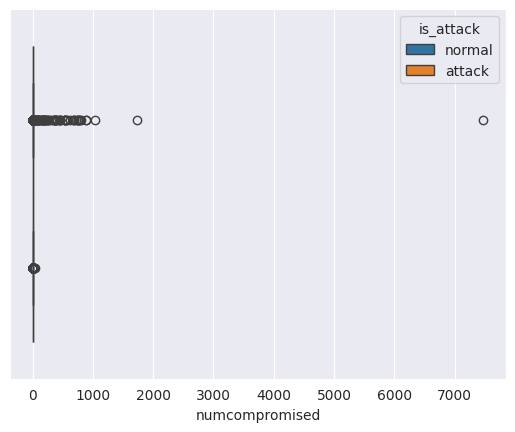

In [34]:
sns.boxplot(data=df,x='numcompromised',hue='is_attack')

In [35]:
df['is_compromised'] = df['numcompromised'].apply(lambda x: 1 if x==1 else 0)

In [36]:
df['is_compromised'].value_counts()

,count
is_compromised,
0,124997
1,976


In [37]:
pd.pivot_table(data=df,index='is_compromised',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
is_compromised,,
0,57738,67259
1,892,84


In [38]:
pd.pivot_table(data=df,index='is_compromised',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
is_compromised,,,,,,
0,992.0,75.0,44971.0,47.0,67259.0,11653.0
1,1.0,883.0,NaN,5.0,84.0,3.0


In [39]:
pd.pivot_table(data=df,index='is_compromised',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_compromised,,,,,,,,,,,
0,46.0,11233.0,1562.0,103.0,2389.0,34851.0,361.0,126.0,49.0,74006.0,271.0
1,NaN,NaN,NaN,NaN,32.0,NaN,4.0,1.0,NaN,939.0,NaN


In [40]:
pd.pivot_table(data=df,index='is_compromised',columns='flag',values='binary_attack',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_compromised,,,,,,,,,,,
0,46.0,11233.0,1562.0,103.0,2389.0,34851.0,361.0,126.0,49.0,74006.0,271.0
1,NaN,NaN,NaN,NaN,32.0,NaN,4.0,1.0,NaN,939.0,NaN


In [41]:
pd.pivot_table(data=df,index='is_compromised',columns='protocoltype',values='binary_attack',aggfunc='count')

protocoltype,icmp,tcp,udp
is_compromised,,,
0,8291.0,101713.0,14993.0
1,NaN,976.0,NaN


In [42]:
pd.pivot_table(data=df,index='is_compromised',columns='loggedin',values='binary_attack',aggfunc='count')

loggedin,0,1
is_compromised,,
0,76121.0,48876.0
1,NaN,976.0


In [43]:
df['rootshell'].value_counts()

,count
rootshell,
0,125804
1,169


In [44]:
pd.pivot_table(data=df,index='rootshell',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
rootshell,,
0,58598,67206
1,32,137


In [45]:
pd.pivot_table(data=df,index='rootshell',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
rootshell,,,,,,
0,987.0,958.0,44971.0,26.0,67206.0,11656.0
1,6.0,NaN,NaN,26.0,137.0,NaN


In [46]:
pd.pivot_table(data=df,index='rootshell',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
rootshell,,,
0,8291.0,102520.0,14993.0
1,NaN,169.0,NaN


In [47]:
pd.pivot_table(data=df,index='rootshell',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
rootshell,,,
0,6982.0,49057.0,2559.0
1,NaN,32.0,NaN


In [48]:
pd.pivot_table(data=df,index='rootshell',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
rootshell,,,,,,,,,,,
0,46.0,11233.0,1561.0,103.0,2416.0,34851.0,353.0,127.0,49.0,74794.0,271.0
1,NaN,NaN,1.0,NaN,5.0,NaN,12.0,NaN,NaN,151.0,NaN


In [49]:
pd.pivot_table(data=df,index='rootshell',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
rootshell,,,,,,,,,,,
0,35.0,8540.0,1343.0,103.0,2275.0,34497.0,4.0,8.0,4.0,11520.0,269.0
1,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,32.0,NaN


In [50]:
df['suattempted'].value_counts()

,count
suattempted,
0,125893
2,59
1,21


In [51]:
df['is_suattempted'] = df['suattempted'].apply(lambda x: 1 if x>=1 else 0)

In [52]:
pd.pivot_table(data=df,index='suattempted',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
suattempted,,
0,58629.0,67264.0
1,1.0,20.0
2,NaN,59.0


In [53]:
pd.pivot_table(data=df,index='suattempted',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
suattempted,,,,,,
0,993.0,957.0,44971.0,52.0,67264.0,11656.0
1,NaN,1.0,NaN,NaN,20.0,NaN
2,NaN,NaN,NaN,NaN,59.0,NaN


In [54]:
pd.pivot_table(data=df,index='suattempted',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
suattempted,,,
0,8291.0,102609.0,14993.0
1,NaN,21.0,NaN
2,NaN,59.0,NaN


In [55]:
pd.pivot_table(data=df,index='suattempted',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
suattempted,,,
0,6982.0,49088.0,2559.0
1,NaN,1.0,NaN
2,NaN,0.0,NaN


In [56]:
pd.pivot_table(data=df,index='suattempted',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
suattempted,,,,,,,,,,,
0,35.0,8540.0,1343.0,103.0,2275.0,34497.0,4.0,8.0,4.0,11551.0,269.0
1,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN


In [57]:
df['is_root'] = df['numroot'].apply(lambda x: 0 if x == 0 else 1)

In [58]:
df['is_root'].value_counts()

,count
is_root,
0,125324
1,649


In [59]:
pd.pivot_table(data=df,index='is_root',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
is_root,,
0,58611,66713
1,19,630


In [60]:
pd.pivot_table(data=df,index='is_root',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
is_root,,,,,,
0,988.0,958.0,44971.0,42.0,66713.0,11652.0
1,5.0,NaN,NaN,10.0,630.0,4.0


In [61]:
pd.pivot_table(data=df,index='is_root',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
is_root,,,
0,8291.0,102040.0,14993.0
1,NaN,649.0,NaN


In [62]:
pd.pivot_table(data=df,index='is_root',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
is_root,,,
0,6982.0,49070.0,2559.0
1,NaN,19.0,NaN


In [63]:
pd.pivot_table(data=df,index='is_root',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_root,,,,,,,,,,,
0,46.0,11233.0,1558.0,103.0,2419.0,34851.0,345.0,126.0,47.0,74325.0,271.0
1,NaN,NaN,4.0,NaN,2.0,NaN,20.0,1.0,2.0,620.0,NaN


In [64]:
pd.pivot_table(data=df,index='is_root',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_root,,,,,,,,,,,
0,35.0,8540.0,1343.0,103.0,2275.0,34497.0,4.0,8.0,4.0,11533.0,269.0
1,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,19.0,NaN


In [65]:
pd.pivot_table(data=df,index='is_root',columns='loggedin',values='binary_attack',aggfunc='sum')

loggedin,0,1
is_root,,
0,56635.0,1976.0
1,NaN,19.0


In [66]:
df['is_file_created'] = df['numfilecreations'].apply(lambda x: 0 if x == 0 else 1)

In [67]:
df['is_file_created'].value_counts()

,count
is_file_created,
0,125686
1,287


In [68]:
pd.pivot_table(data=df,index='is_file_created',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
is_file_created,,
0,58596,67090
1,34,253


In [69]:
pd.pivot_table(data=df,index='is_file_created',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
is_file_created,,,,,,
0,985.0,957.0,44971.0,29.0,67090.0,11654.0
1,8.0,1.0,NaN,23.0,253.0,2.0


In [70]:
pd.pivot_table(data=df,index='is_file_created',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
is_file_created,,,
0,8291.0,102402.0,14993.0
1,NaN,287.0,NaN


In [71]:
pd.pivot_table(data=df,index='is_file_created',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
is_file_created,,,
0,6982.0,49055.0,2559.0
1,NaN,34.0,NaN


In [72]:
pd.pivot_table(data=df,index='is_file_created',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_file_created,,,,,,,,,,,
0,46.0,11233.0,1558.0,103.0,2419.0,34851.0,349.0,127.0,48.0,74681.0,271.0
1,NaN,NaN,4.0,NaN,2.0,NaN,16.0,NaN,1.0,264.0,NaN


In [73]:
pd.pivot_table(data=df,index='is_file_created',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_file_created,,,,,,,,,,,
0,35.0,8540.0,1342.0,103.0,2275.0,34497.0,4.0,8.0,4.0,11519.0,269.0
1,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,0.0,33.0,NaN


In [74]:
df['numshells'].value_counts()

,count
numshells,
0,125926
1,42
2,5


In [75]:
pd.pivot_table(data=df,index='numshells',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
numshells,,
0,58622,67304
1,5,37
2,3,2


In [76]:
pd.pivot_table(data=df,index='numshells',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
numshells,,,,,,
0,991.0,957.0,44971.0,47.0,67304.0,11656.0
1,1.0,1.0,NaN,3.0,37.0,NaN
2,1.0,NaN,NaN,2.0,2.0,NaN


In [77]:
pd.pivot_table(data=df,index='numshells',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
numshells,,,
0,8291.0,102642.0,14993.0
1,NaN,42.0,NaN
2,NaN,5.0,NaN


In [78]:
pd.pivot_table(data=df,index='numshells',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
numshells,,,
0,6982.0,49081.0,2559.0
1,NaN,5.0,NaN
2,NaN,3.0,NaN


In [79]:
pd.pivot_table(data=df,index='numshells',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
numshells,,,,,,,,,,,
0,46.0,11233.0,1562.0,103.0,2421.0,34851.0,365.0,127.0,49.0,74898.0,271.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [80]:
pd.pivot_table(data=df,index='numshells',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
numshells,,,,,,,,,,,
0,35.0,8540.0,1343.0,103.0,2275.0,34497.0,4.0,8.0,4.0,11544.0,269.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [81]:
pd.pivot_table(data=df,index='numshells',columns='loggedin',values='binary_attack',aggfunc='sum')

loggedin,0,1
numshells,,
0,56635.0,1987.0
1,NaN,5.0
2,NaN,3.0


In [82]:
df['is_access'] = df['numaccessfiles'].apply(lambda x: 0 if x == 0 else 1)

In [83]:
df['is_access'].value_counts()

,count
is_access,
0,125602
1,371


In [84]:
pd.pivot_table(data=df,index='is_access',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
is_access,,
0,58620,66982
1,10,361


In [85]:
pd.pivot_table(data=df,index='is_access',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
is_access,,,,,,
0,985.0,957.0,44971.0,51.0,66982.0,11656.0
1,8.0,1.0,NaN,1.0,361.0,NaN


In [86]:
pd.pivot_table(data=df,index='is_access',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
is_access,,,
0,8291.0,102318.0,14993.0
1,NaN,371.0,NaN


In [87]:
pd.pivot_table(data=df,index='is_access',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
is_access,,,
0,6982.0,49079.0,2559.0
1,NaN,10.0,NaN


In [88]:
pd.pivot_table(data=df,index='is_access',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_access,,,,,,,,,,,
0,46.0,11233.0,1560.0,103.0,2420.0,34851.0,359.0,127.0,46.0,74586.0,271.0
1,NaN,NaN,2.0,NaN,1.0,NaN,6.0,NaN,3.0,359.0,NaN


In [89]:
pd.pivot_table(data=df,index='is_access',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_access,,,,,,,,,,,
0,35.0,8540.0,1343.0,103.0,2275.0,34497.0,4.0,8.0,4.0,11542.0,269.0
1,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,10.0,NaN


In [90]:
pd.pivot_table(data=df,index='is_access',columns='loggedin',values='binary_attack',aggfunc='count')

loggedin,0,1
is_access,,
0,76121.0,49481.0
1,NaN,371.0


In [91]:
df['ishostlogin'].value_counts()

,count
ishostlogin,
0,125972
1,1


In [92]:
pd.pivot_table(data=df,index='ishostlogin',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
ishostlogin,,
0,58630.0,67342.0
1,NaN,1.0


In [93]:
pd.pivot_table(data=df,index='ishostlogin',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
ishostlogin,,,
0,8291.0,102688.0,14993.0
1,NaN,1.0,NaN


In [94]:
pd.pivot_table(data=df,index='ishostlogin',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
ishostlogin,,,,,,,,,,,
0,46.0,11233.0,1562.0,103.0,2421.0,34851.0,365.0,127.0,49.0,74944.0,271.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [95]:
pd.pivot_table(data=df,index='ishostlogin',columns='loggedin',values='duration',aggfunc='count')

loggedin,0,1
ishostlogin,,
0,76121.0,49851.0
1,NaN,1.0


In [96]:
df['isguestlogin'].value_counts()

,count
isguestlogin,
0,124786
1,1187


In [97]:
pd.pivot_table(data=df,index='isguestlogin',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
isguestlogin,,
0,58316,66470
1,314,873


In [98]:
pd.pivot_table(data=df,index='isguestlogin',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
isguestlogin,,,,,,
0,680.0,958.0,44971.0,52.0,66470.0,11655.0
1,313.0,NaN,NaN,NaN,873.0,1.0


In [99]:
pd.pivot_table(data=df,index='isguestlogin',columns='protocoltype',values='duration',aggfunc='count')

protocoltype,icmp,tcp,udp
isguestlogin,,,
0,8291.0,101502.0,14993.0
1,NaN,1187.0,NaN


In [100]:
pd.pivot_table(data=df,index='isguestlogin',columns='protocoltype',values='binary_attack',aggfunc='sum')

protocoltype,icmp,tcp,udp
isguestlogin,,,
0,6982.0,48775.0,2559.0
1,NaN,314.0,NaN


In [101]:
pd.pivot_table(data=df,index='isguestlogin',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
isguestlogin,,,,,,,,,,,
0,44.0,11233.0,1557.0,103.0,2421.0,34851.0,356.0,126.0,49.0,73775.0,271.0
1,2.0,NaN,5.0,NaN,NaN,NaN,9.0,1.0,NaN,1170.0,NaN


In [102]:
pd.pivot_table(data=df,index='isguestlogin',columns='flag',values='binary_attack',aggfunc='sum')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
isguestlogin,,,,,,,,,,,
0,35.0,8540.0,1342.0,103.0,2275.0,34497.0,4.0,8.0,4.0,11239.0,269.0
1,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,NaN,313.0,NaN


In [103]:
pd.pivot_table(data=df,index='isguestlogin',columns='loggedin',values='binary_attack',aggfunc='count')

loggedin,0,1
isguestlogin,,
0,76116,48670
1,5,1182


<Axes: xlabel='samesrvrate'>

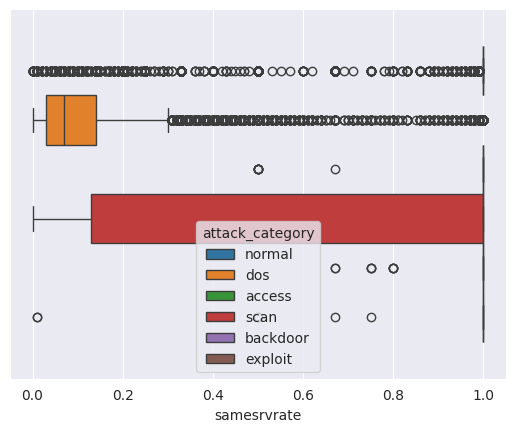

In [106]:
sns.boxplot(data=df,x='samesrvrate',hue='attack_category')

<Axes: xlabel='diffsrvrate'>

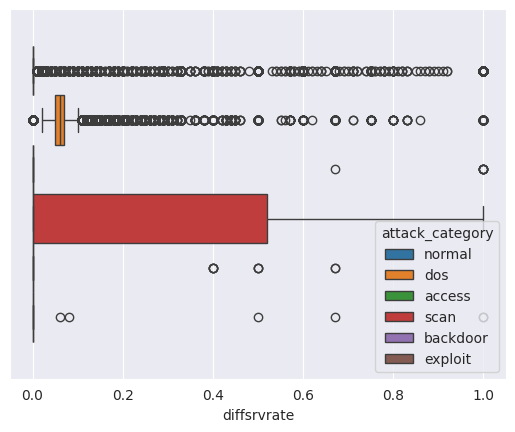

In [107]:
sns.boxplot(data=df,x='diffsrvrate',hue='attack_category')

<Axes: xlabel='dsthostdiffsrvrate'>

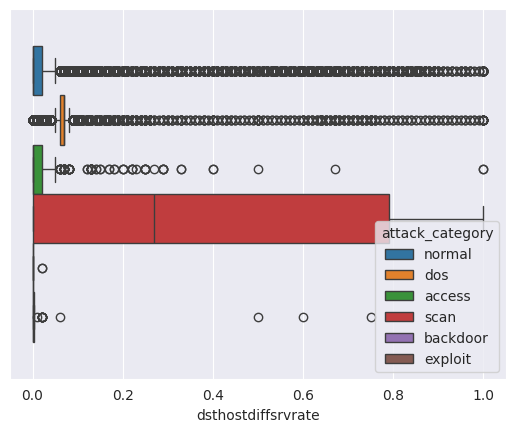

In [108]:
sns.boxplot(data=df,x='dsthostdiffsrvrate',hue='attack_category')

<Axes: xlabel='dsthostsamesrvrate'>

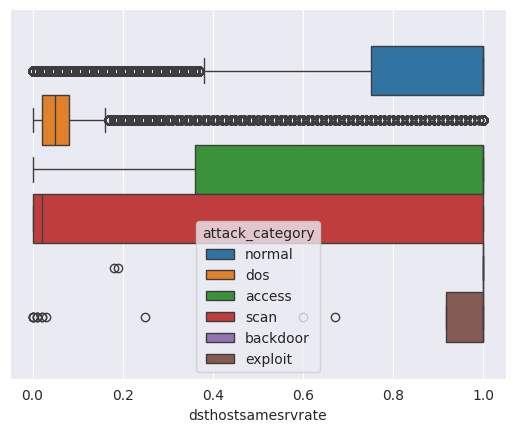

In [109]:
sns.boxplot(data=df,x='dsthostsamesrvrate',hue='attack_category')